# Christine Martinez
### Module 7 Project

In [11]:
%matplotlib inline

In [12]:
import pandas as pd

In [13]:
c=lambda f: 5/9* (f-32)
temps= [(f,c(f)) for f in range (0,101, 10)]

In [14]:
temps_df=pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])

### Plot Celsius vs Farenheit

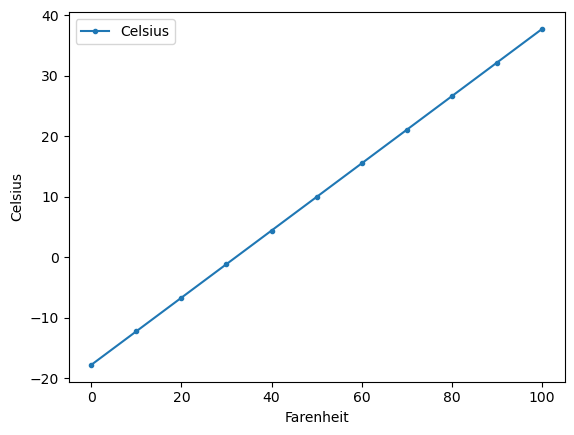

In [15]:
axes=temps_df.plot(x='Farenheit', y='Celsius', style='.-')
y_label=axes.set_ylabel('Celsius')

### January High Temps
Load Data

In [16]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

View the Data: Head and Tail

In [17]:
nyc.head()

,Date,Value,Anomaly
0,189501,33.3,-3.7
1,189601,33.3,-3.7
2,189701,34.1,-2.9
3,189801,38.6,1.6
4,189901,35.0,-2.0


In [18]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.5
120,201501,36.1,-0.9
121,201601,40.8,3.8
122,201701,42.8,5.8
123,201801,38.7,1.7


### Cleaning the Data

In [19]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [20]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,33.3,-3.7
1,189601,33.3,-3.7
2,189701,34.1,-2.9


In [21]:
nyc.Date.dtype

dtype('int64')

In [22]:
nyc.Date=nyc.Date.floordiv(100)

In [23]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,33.3,-3.7
1,1896,33.3,-3.7
2,1897,34.1,-2.9


### Calculating Basic Descriptive Statistics for the DataSet

In [25]:
pd.set_option('display.precision', 2)

In [26]:
nyc.Temperature.describe()

count    124.00
mean      36.97
std        4.58
min       25.50
25%       33.88
50%       37.00
75%       40.10
max       47.60
Name: Temperature, dtype: float64

### Forecasting Future January Average High Temps
Linear Regression

In [28]:
from scipy import stats

In [30]:
linear_regression = stats.linregress(x = nyc.Date, y = nyc.Temperature)

In [31]:
#Slope
slope=linear_regression.slope

In [32]:
slope

0.027555310778914235

In [33]:
#Retrieve intercept
intercept=linear_regression.intercept
intercept

-16.940191345397317

### Predict New Values

In [35]:
# Average F temp for Jan 2019
linear_regression,slope * 2019 + linear_regression.intercept

(LinregressResult(slope=0.027555310778914235, intercept=-16.940191345397317, rvalue=0.21627591813671862, pvalue=0.015839964783810088, stderr=0.011261983420768005, intercept_stderr=22.037757812675654),
 38.69398111723052)

In [36]:
# Avg F temp for Jan 1890
linear_regression,slope * 1890 + linear_regression.intercept

(LinregressResult(slope=0.027555310778914235, intercept=-16.940191345397317, rvalue=0.21627591813671862, pvalue=0.015839964783810088, stderr=0.011261983420768005, intercept_stderr=22.037757812675654),
 35.13934602675059)

In [37]:
#Avg F temp for Jan 2026
linear_regression,slope * 2026 + linear_regression.intercept

(LinregressResult(slope=0.027555310778914235, intercept=-16.940191345397317, rvalue=0.21627591813671862, pvalue=0.015839964783810088, stderr=0.011261983420768005, intercept_stderr=22.037757812675654),
 38.88686829268293)

### Seaborn ScatterPlot

In [38]:
import seaborn as sns

(10.0, 70.0)

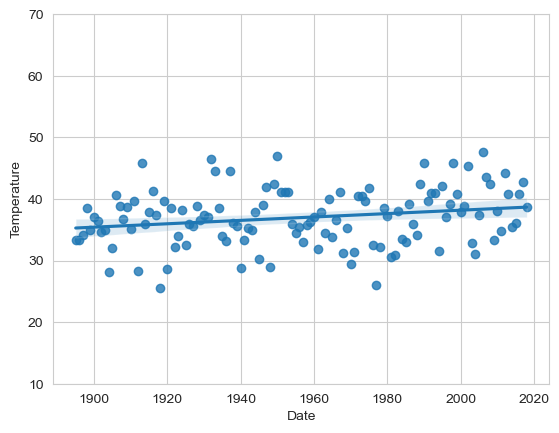

In [40]:
#Best fit line for temperature and date
sns.set_style('whitegrid')
axes=sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10,70)

### Simple Linear Regression:Scikit-Learn

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#Split data: train and test sets
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [44]:
#Confirm 75% of data is in the train set
X_train.shape

(93, 1)

In [45]:
#Confirm 25% is in the test set
X_test.shape

(31, 1)

### Training the Model

In [46]:
from sklearn.linear_model import LinearRegression

In [48]:
linear_regression2 = LinearRegression()

In [49]:
linear_regression2.fit(X = X_train, y = y_train)

LinearRegression()

In [51]:
slope2 = linear_regression2.coef_
slope2

array([0.03226015])

In [52]:
intercept2 = linear_regression2.intercept_
intercept2

-26.112206410283967

### Testing the Model